# Creating a Filter, Edge Detection

### Import resources and display image

In [10]:
pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 65.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 64.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


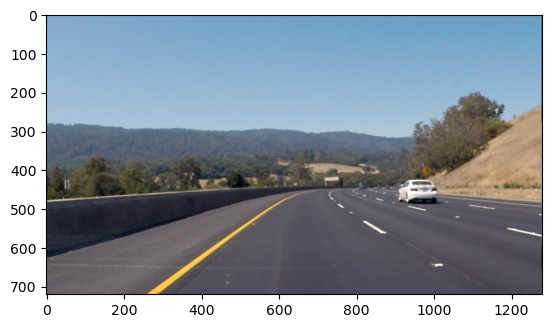

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('data/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

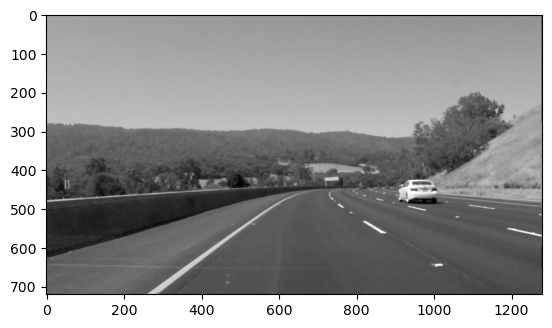

In [13]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="notebook_ims/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

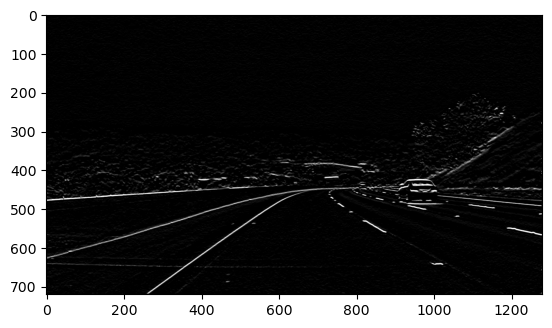

In [17]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[ -1, 0, 1], 
                   [ -2, 0, 2], 
                   [ -1, 0, 1]])


# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image_y = cv2.filter2D(gray, -1, sobel_y)
plt.imshow(filtered_image_y, cmap='gray')

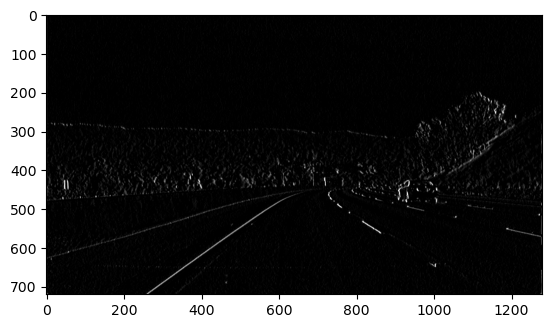

In [18]:
filtered_image_x = cv2.filter2D(gray, -1, sobel_x)
plt.imshow(filtered_image_x, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter
* Apply your filters to the other images in the `images` directory.



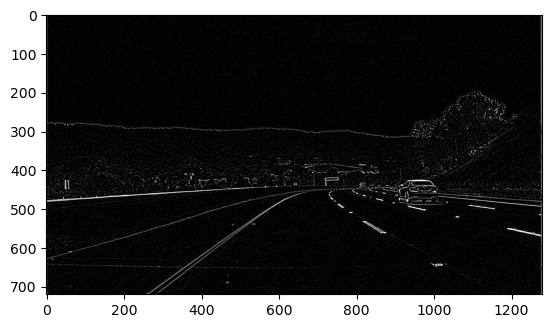

In [22]:
#  One of the most popular kernels is  Laplacian of Gaussian (LoG)
#  The LoG operator is used for edge detection and combines Gaussian smoothing with the Laplacian edge detection

LoG = np.array([[0, 0, -1, 0, 0], 
                             [0, -1, -2, -1, 0], 
                             [-1, -2, 16, -2, -1], 
                             [0, -1, -2, -1, 0], 
                             [0, 0, -1, 0, 0]])
filtered_image_LoG = cv2.filter2D(gray, -1, LoG)
plt.imshow(filtered_image_LoG, cmap='gray')

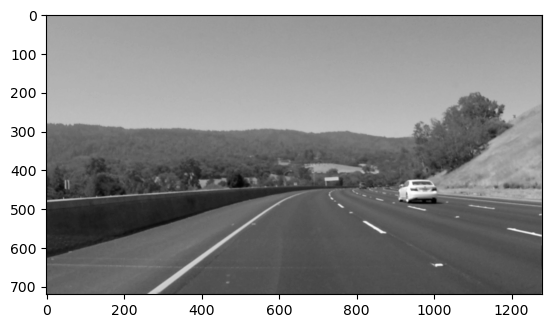

In [23]:
# Another poular kernel is the Gaussian Blur
GaussianBlur = np.array([[1, 2, 1], 
                         [2, 4, 2], 
                         [1, 2, 1]]) / 16
filtered_image_GaussianBlur = cv2.filter2D(gray, -1, GaussianBlur)
plt.imshow(filtered_image_GaussianBlur, cmap='gray')

In [24]:
list_of_kernels = [sobel_y, sobel_x, LoG, GaussianBlur]

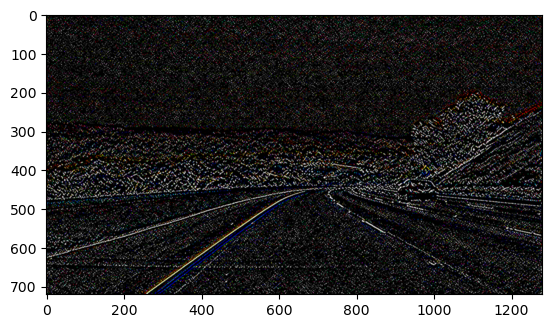

In [29]:
# Apply all kernels to an image
def ApplyAllKernels(image, list_of_kernels):
    filtered_image = image
    for kernel in list_of_kernels:
        filtered_image = cv2.filter2D(filtered_image, -1, kernel)
    return filtered_image

filtered_image = ApplyAllKernels(image, list_of_kernels)
plt.imshow(filtered_image, cmap='gray')

In [35]:
import os

data_dir = 'data'
output_dir = 'processed_images'
os.makedirs(output_dir, exist_ok=True)

files = os.listdir(data_dir)

# Filter out only the jpg images
#jpg_files = [f for f in files if f.lower().endswith('.jpg')]

for file in files:
    image_path = os.path.join(data_dir, file)
    image_rgb = mpimg.imread(image_path)
    #image_rgb = cv2.cvtColor(image_path, cv2.COLOR_BGR2RGB)
    image_filtered = ApplyAllKernels(image_rgb, list_of_kernels)
    output_path = os.path.join(output_dir, file)
    cv2.imwrite(output_path, cv2.cvtColor(image_filtered, cv2.COLOR_RGB2BGR))
    